In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys


In [34]:
BOCM = pd.read_csv('day300750.csv')
BOCM.index = BOCM.iloc[:,1]

In [35]:
BOCM.index = pd.to_datetime(BOCM.index, format='%Y-%m-%d')

In [36]:
BOCM = BOCM['2019-01-01':'2020-09-30']

In [37]:
BOCM.head(5)

,Unnamed: 0,date,open,close,high,low,volume,code
date,,,,,,,,
2019-01-02,138,2019-01-02,74.25,73.66,74.97,73.53,43940.0,300750
2019-01-03,139,2019-01-03,72.51,73.83,74.54,72.51,44949.0,300750
2019-01-04,140,2019-01-04,73.33,76.96,77.24,73.23,79053.0,300750
2019-01-07,141,2019-01-07,76.94,77.42,77.65,76.30,59695.0,300750
2019-01-08,142,2019-01-08,77.22,79.33,79.45,77.20,85749.0,300750


In [38]:
BOCM.tail()

,Unnamed: 0,date,open,close,high,low,volume,code
date,,,,,,,,
2020-09-24,560,2020-09-24,193.65,190.82,195.80,190.11,106680.0,300750
2020-09-25,561,2020-09-25,193.60,191.50,194.70,190.59,68012.0,300750
2020-09-28,562,2020-09-28,193.45,192.91,196.95,191.81,82332.0,300750
2020-09-29,563,2020-09-29,195.49,204.99,206.25,195.43,202436.0,300750
2020-09-30,564,2020-09-30,205.30,209.20,211.01,203.80,159908.0,300750


In [39]:
BOCM.index = pd.to_datetime(BOCM.index,format='%Y-%m-%d')
BOCM = BOCM.iloc[:,2:]
BOCM.head()

,open,close,high,low,volume,code
date,,,,,,
2019-01-02,74.25,73.66,74.97,73.53,43940.0,300750
2019-01-03,72.51,73.83,74.54,72.51,44949.0,300750
2019-01-04,73.33,76.96,77.24,73.23,79053.0,300750
2019-01-07,76.94,77.42,77.65,76.30,59695.0,300750
2019-01-08,77.22,79.33,79.45,77.20,85749.0,300750


In [40]:
BOCMclp = BOCM.close
clprcChange = BOCMclp-BOCMclp.shift(1)

In [41]:
clprcChange = clprcChange.dropna()
clprcChange[0:6]

date
2019-01-03    0.17
2019-01-04    3.13
2019-01-07    0.46
2019-01-08    1.91
2019-01-09   -1.35
2019-01-10   -1.70
Name: close, dtype: float64

In [42]:
indexprc = clprcChange.index
upPrc = pd.Series(0,index=indexprc)
upPrc[clprcChange>0]=clprcChange[clprcChange>0]
downPrc = pd.Series(0,index=indexprc)
downPrc[clprcChange<0] = -clprcChange[clprcChange<0]
rsidata = pd.concat([BOCMclp,clprcChange,upPrc,downPrc],axis=1)
rsidata.colums=['Close','PrcChange','upPrc','downPrc']
rsidata= rsidata.dropna();
rsidata.head()

D:\rgzn\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,close,close,0,1
date,,,,
2019-01-03,73.83,0.17,0.17,0.00
2019-01-04,76.96,3.13,3.13,0.00
2019-01-07,77.42,0.46,0.46,0.00
2019-01-08,79.33,1.91,1.91,0.00
2019-01-09,77.98,-1.35,0.00,1.35


In [43]:
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [44]:
rsi6 = [100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(0,len(SMUP))]

In [45]:
indexRsi = indexprc[5:]
Rsi6 = pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    421.000000
mean      53.682052
std       23.893296
min        0.000000
25%       37.577066
50%       54.725611
75%       71.605603
max      100.000000
dtype: float64

Text(0, 0.5, 'Rsi6')

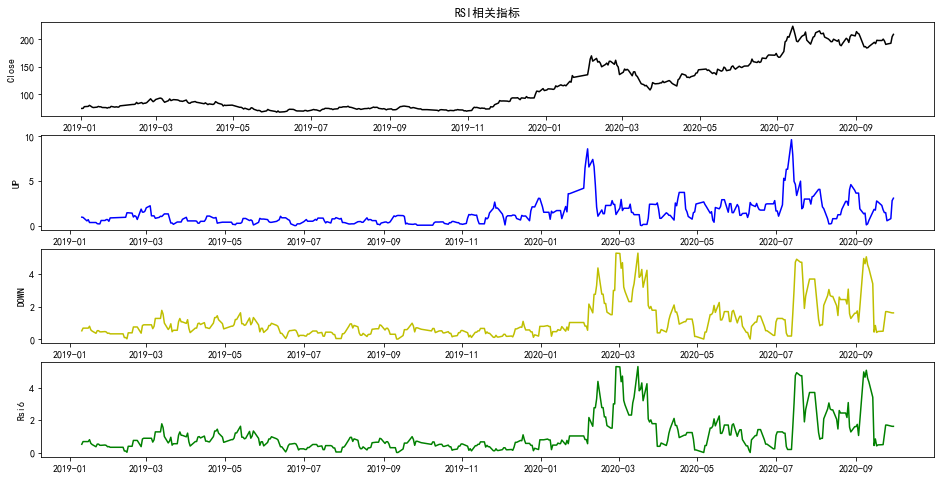

In [46]:
fig = plt.figure(figsize=(16,8))
UP = pd.Series(SMUP,index=indexRsi)
DOWN = pd.Series(SMDOWN,index=indexRsi)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(411)
plt.plot(BOCMclp,'k')
plt.xlabel('data')
plt.ylabel('Close')
plt.title('RSI相关指标')
plt.subplot(412)
plt.plot(UP,'b')
plt.ylabel('UP')
plt.subplot(413)
plt.plot(DOWN,'y')
plt.ylabel('DOWN')
plt.subplot(414)
plt.plot(DOWN,'g')
plt.ylabel('Rsi6')

In [47]:
def rsi(price,period=6):
    import pandas as pd
    clprcChange = price-price.shift(1)
    clprcChange = clprcChange.dropna()
    indexprc = clprcChange.index
    upPrc = pd.Series(0,index=indexprc)
    upPrc[clprcChange>0] = clprcChange[clprcChange>0]
    downPrc = pd.Series(0,index=indexprc)
    downPrc[clprcChange <0] = -clprcChange[clprcChange <0]
    rsidata = pd.concat([price,clprcChange,upPrc,downPrc],axis=1)
    rsidata.columns = ['price','PrcChange','upPrc','downPrc']
    rsidata = rsidata.dropna();
    SMUP = []
    SMDOWN = []
    for i in range(period,len(upPrc)+1):
        SMUP.append(np.mean(upPrc.values[(i-period):i],dtype=np.float32))
        rsi = [100*SMUP[i]/(SMUP[i]+SMDOWN[i]) \
        for i in range(0,len(SMUP))]
    indexRsi = indexprc[(period-1):]
    rsi = pd.Series(rsi,index=indexRsi)
    return(rsi)


In [48]:
Rsi12 = rsi(BOCMclp,12)
Rsi12.tail()

IndexError: list index out of range

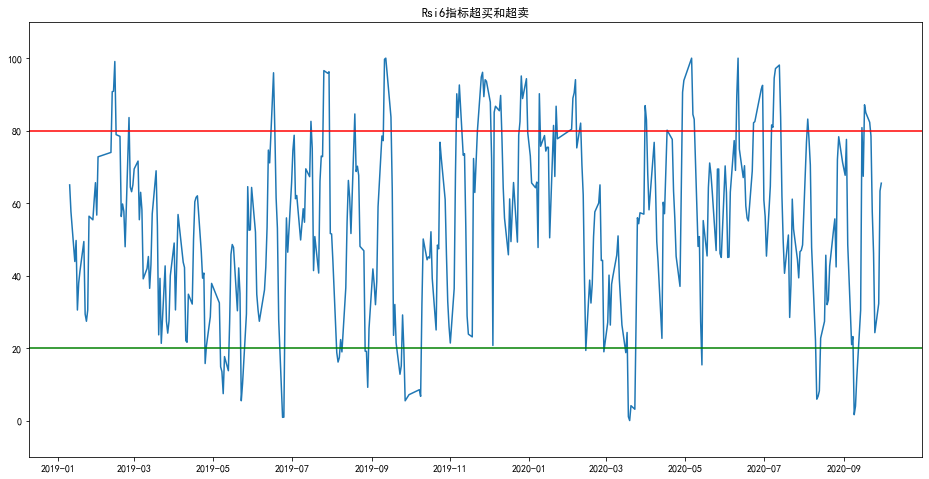

In [49]:
fig = plt.figure(figsize=(16,8))
plt.plot(Rsi6)
plt.title('Rsi6指标超买和超卖')
plt.ylim(-10,110)
plt.axhline(y = 80,color='red')
plt.axhline(y = 20,color='green')
plt.show()

NameError: name 'Rsi24' is not defined

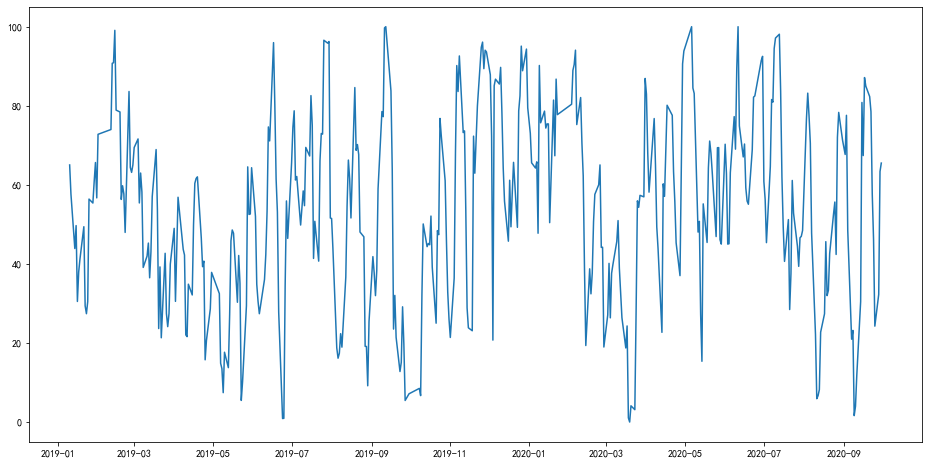

In [31]:
#黄金交叉和死亡交叉
fig = plt.figure(figsize=(16,8))
plt.plot(Rsi6['2015-01-03':],label = 'Rsi6')
plt.plot(Rsi24['2015-01-03':],label='Rsi24',color = 'red',linestyle = 'dashed')
plt.title('RSI的黄金交叉与死亡交叉')
plt.ylim(-10,110)
plt.legend()

In [32]:
import pandas as pd
#策略模式
BOCM = pd.read_csv('day300750.csv')
BOCM.index = BOCM.iloc[:,1]
BOCM.index = pd.to_datetime(BOCM.index,format='%Y-%m-%d')
BOCM = BOCM['2019-01-01':'2020-06-28']
BOCMclp = BOCM.close
BOCMclp[0:4]

date
2019-01-02    73.66
2019-01-03    73.83
2019-01-04    76.96
2019-01-07    77.42
Name: close, dtype: float64

In [50]:
rsi6 = rsi(BOCMclp,10)
rsi24 = rsi(BOCMclp,30)

IndexError: list index out of range

In [51]:
Sig1 = []
for i in rsi6:
    if i>80:
        Sig1.append(-1)
    elif i<20:
        Sig1.append(1)
    else:
        Sig1.append(0)

In [53]:
date1 = rsi6.index
Signal1= pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)
Signal2 = pd.Series(0,index=rsi24.index)
lagrsi6 = rsi6.shift(1)
lagrsi24 = rsi24.shift(1)
for i in rsi24.index:
    if(rsi6[i]>rsi24[i]) & (lagrsi6[i]<lagrsi24[i]):
        Signal2[i] = 1
    elif(rsi6[i]<rsi24[i]) & (lagrsi6[i]>lagrsi24[i]):
        Signal2[i] = -1
signal = Signal1+Signal2
signal[signal>=1] = 1
signal[signal<=-1] = -1
signal= signal.dropna()
tradSig = signal.shift(1)
ret = BOCMclp/BOCMclp.shift(1)-1
ret.head()
ret = ret[tradSig.index]
buy = tradSig[tradSig==1]
buyRet = ret[tradSig==1]*buy
sell = tradSig[tradSig==-1]
sellRet = ret[tradSig==1]*sell
tradeRet = ret*tradSig

TypeError: 'builtin_function_or_method' object is not iterable

In [54]:
Signal2[Signal2==1]

NameError: name 'Signal2' is not defined